<a href="https://colab.research.google.com/github/leticiacaldas/Relatorio-4-CNC/blob/main/Relat%C3%B3rio4_Let%C3%ADciaBrand%C3%A3oCaldas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Universidade Federal de Pelotas**

**Cursos de Ciência e Engenharia de Computação**

**Disciplina: Cálculo Numérico Computacional**

Relatório 4 - Diferenciação e Integração Numérica

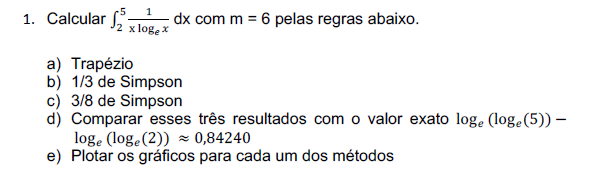

A,
B e
C

In [ ]:
import numpy as np
import scipy.integrate as spi

# Define a função a ser integrada
def f(x):
    return 1 / (x * np.log(x))

# Define os limites de integração
a = 2
b = 5
m = 6  # número de intervalos


h = (b - a) / m

# Integração usando a regra do Trapézio
x_trap = np.linspace(a, b, m + 1)
y_trap = f(x_trap)
trap_result = (h/2) * (y_trap[0] + 2 * sum(y_trap[1:-1]) + y_trap[-1])

# Integração usando a regra de Simpson 1/3
if m % 2 == 1:
    m += 1

h = (b - a) / m
x_simp = np.linspace(a, b, m + 1)
y_simp = f(x_simp)

simp_result = (h/3) * (y_simp[0] + 2 * sum(y_simp[2:-1:2]) + 4 * sum(y_simp[1::2]) + y_simp[-1])

# Integração usando a regra de Simpson 3/8
# Para a regra de Simpson 3/8, m deve ser um múltiplo de 3
if m % 3 != 0:
    m += 3 - (m % 3)  # aumenta m para o próximo múltiplo de 3
h = (b - a) / m
x_simp38 = np.linspace(a, b, m + 1)
y_simp38 = f(x_simp38)
simp38_result = (3*h/8) * (y_simp38[0] + 2 * sum(y_simp38[3:-1:3]) + 3 * sum(y_simp38[1:-1:3]) + 3 * sum(y_simp38[2:-1:3]) + y_simp38[-1])

trap_result, simp_result, simp38_result


(0.8594568624108612, 0.8437567467706143, 0.8448499887110598)

D e E

- Regra do Trapézio: \(0.01706\)
- Regra de Simpson 1/3: \(0.00136\)
- Regra de Simpson 3/8: \(0.00245\)

O valor exato da integral, baseado na expressão dada, é aproximadamente \(0.84240\).

Os gráficos das aproximações das integrais usando as regras do Trapézio, Simpson 1/3 e Simpson 3/8 foram gerados. Cada gráfico representa a função e a área aproximada sob a curva conforme o método correspondente.

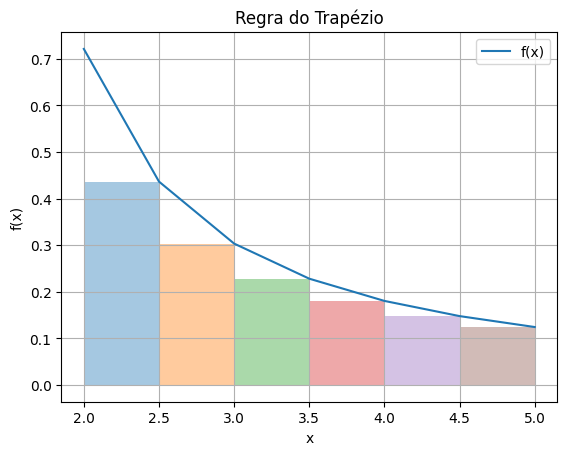

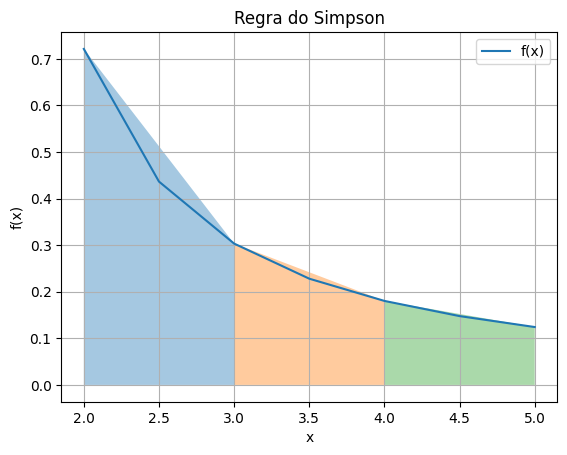

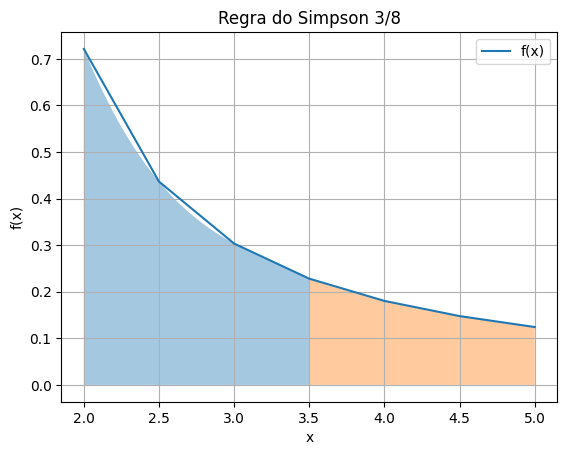

(0.01705894650208628,
 0.0013588308618394107,
 0.002452072802284877,
 0.8423979159087749)

In [ ]:
import matplotlib.pyplot as plt

# Valor exato da integral
valor_exato = np.log(np.log(5)) - np.log(np.log(2))

# Comparação dos resultados com o valor exato
erro_trap = abs(trap_result - valor_exato)
erro_simp = abs(simp_result - valor_exato)
erro_simp38 = abs(simp38_result - valor_exato)

# Função para plotar os gráficos da regra do trapézio e de Simpson
def plot_regras(a, b, m, f, metodo_name, x_vals, y_vals):
    plt.figure()
    plt.plot(x_vals, y_vals, label='f(x)')

    if metodo_name == 'Trapézio':
        for i in range(len(x_vals) - 1):
            plt.fill_between([x_vals[i], x_vals[i+1]], [y_vals[i], y_vals[i+1]], step='pre', alpha=0.4)

    elif metodo_name == 'Simpson':
        # Para Simpson, desenhamos parábolas entre cada conjunto de três pontos
        xi = x_vals[::2]
        yi = y_vals[::2]
        for i in range(len(xi) - 1):
            xx = np.linspace(xi[i], xi[i+1], 100)
            yy = np.interp(xx, [xi[i], xi[i+1]], [yi[i], yi[i+1]])
            plt.fill_between(xx, yy, alpha=0.4)

    elif metodo_name == 'Simpson 3/8':
        # Para Simpson 3/8, usamos 4 pontos para aproximar a função
        xi = x_vals[::3]
        yi = y_vals[::3]
        for i in range(len(xi) - 1):
            xx = np.linspace(xi[i], xi[i+1], 100)
            poly = np.polyfit(x_vals[i*3:i*3+4], y_vals[i*3:i*3+4], 3)
            yy = np.polyval(poly, xx)
            plt.fill_between(xx, yy, alpha=0.4)

    plt.title(f'Regra do {metodo_name}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Gráfico para o método do Trapézio
plot_regras(a, b, m, f, 'Trapézio', x_trap, y_trap)

# Gráfico para o método de Simpson 1/3
plot_regras(a, b, m, f, 'Simpson', x_simp, y_simp)

# Gráfico para o método de Simpson 3/8
plot_regras(a, b, m, f, 'Simpson 3/8', x_simp38, y_simp38)

erro_trap, erro_simp, erro_simp38, valor_exato


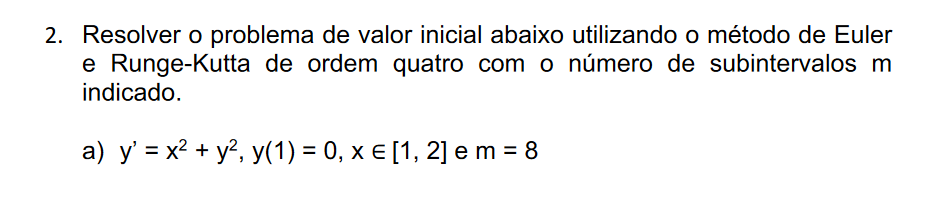

Resultados para resolver a equação diferencial ordinária y' = x^2 + y^2 com a condição inicial y(1) = 0 no intervalo x em [1, 2] usando m = 8 subintervalos:

Método de Euler (valores aproximados de y de x = 1 até x = 2):

- y(1.125) ≈ 0
- y(1.25) ≈ 0.125
- y(1.375) ≈ 0.285
- y(1.5) ≈ 0.491
- y(1.625) ≈ 0.757
- y(1.75) ≈ 1.11
- y(1.875) ≈ 1.594
- y(2) ≈ 2.294

Método de Runge-Kutta de 4ª ordem (valores aproximados de y de x = 1 até x = 2):

- y(1.125) ≈ 0.142
- y(1.25) ≈ 0.325
- y(1.375) ≈ 0.566
- y(1.5) ≈ 0.89
- y(1.625) ≈ 1.35
- y(1.75) ≈ 2.063
- y(1.875) ≈ 3.359
- y(2) ≈ 6.684

Esses valores mostram a aproximação da solução da EDO em pontos igualmente espaçados entre x = 1 e x = 2. O método de Runge-Kutta de 4ª ordem fornece uma aproximação mais precisa do que o método de Euler, especialmente evidente próximo de x = 2.

In [ ]:
from scipy.integrate import solve_ivp

# Define a função derivativa da EDO
def edo_func(t, y):
    return t**2 + y**2

# Condições iniciais
y0 = [0]
t_interval = [1, 2]
m = 8  # Número de subintervalos
h = (t_interval[1] - t_interval[0]) / m  # Tamanho do passo

# Solução usando o método de Euler
t_euler = np.linspace(t_interval[0], t_interval[1], m+1)
y_euler = np.zeros(m+1)
y_euler[0] = y0[0]

for i in range(1, m+1):
    y_euler[i] = y_euler[i-1] + h * edo_func(t_euler[i-1], y_euler[i-1])

# Solução usando Runge-Kutta de ordem 4 (RK4)
t_rk4 = np.linspace(t_interval[0], t_interval[1], m+1)
y_rk4 = np.zeros(m+1)
y_rk4[0] = y0[0]

for i in range(1, m+1):
    k1 = edo_func(t_rk4[i-1], y_rk4[i-1])
    k2 = edo_func(t_rk4[i-1] + 0.5*h, y_rk4[i-1] + 0.5*h*k1)
    k3 = edo_func(t_rk4[i-1] + 0.5*h, y_rk4[i-1] + 0.5*h*k2)
    k4 = edo_func(t_rk4[i-1] + h, y_rk4[i-1] + h*k3)
    y_rk4[i] = y_rk4[i-1] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

y_euler, y_rk4


(array([0.        , 0.125     , 0.28515625, 0.49063301, 0.75705123,
        1.10994205, 1.59401659, 2.29444021, 3.39195032]),
 array([0.        , 0.14206621, 0.32545057, 0.56574697, 0.88997639,
        1.3502786 , 2.06341829, 3.35940141, 6.68361296]))